# Proyecto Final - Predicción de Salarios en Ciencia de Datos

#### Objetivo del proyecto
Desarrollar una red neuronal artificial que pueda predecir el salario de un puesto de trabajo en Data Science basándose en las características del puesto (descripción, nivel de experiencia, tipo de empleo, ubicación, etc.).


## 1.1 Carga y Exploración del Conjunto de Datos
Objetivo: Cargar el dataset y realizar una primera exploración para entender su estructura, dimensiones y tipos de datos.


In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Cargar el dataset
data = pd.read_csv('Dataset/glassdoor_jobs.csv')

In [9]:
# Mostrar las primeras filas del dataset
print("\n1. Primeras 5 filas del dataset:")
print("-" * 80)
display(data.head())


1. Primeras 5 filas del dataset:
--------------------------------------------------------------------------------


Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  
0                                                 -1  
1                                                 -1  
2                                                 -1  
3  Oak Ridge National Laboratory, National Renewa...  
4               Commerce Signals, Cardlytics, Yodlee

In [10]:
# Mostrar las últimas filas del dataset
print("\n2. Últimas 5 filas del dataset:")
print("-" * 80)
display(data.tail())


2. Últimas 5 filas del dataset:
--------------------------------------------------------------------------------


Unnamed: 0                                          Job Title  \
951         951                               Senior Data Engineer   
952         952  Project Scientist - Auton Lab, Robotics Institute   
953         953                               Data Science Manager   
954         954                                      Data Engineer   
955         955          Research Scientist – Security and Privacy   

                 Salary Estimate  \
951  $72K-$133K (Glassdoor est.)   
952   $56K-$91K (Glassdoor est.)   
953  $95K-$160K (Glassdoor est.)   
954                           -1   
955  $61K-$126K (Glassdoor est.)   

                                       Job Description  Rating  \
951  THE CHALLENGE\nEventbrite has a world-class da...     4.4   
952  The Auton Lab at Carnegie Mellon University is...     2.6   
953  Data Science ManagerResponsibilities:\n\nOvers...     3.2   
954  Loading...\n\nTitle: Data Engineer\n\nLocation...     4.8   
955  Returning Candidate? Log back in to the Career...     3.6   

                            Company Name         Location       Headquarters  \
951                      Eventbrite\n4.4    Nashville, TN  San Francisco, CA   
952  Software Engineering Institute\n2.6   Pittsburgh, PA     Pittsburgh, PA   
953                    Numeric, LLC\n3.2    Allentown, PA    Chadds Ford, PA   
954                            IGNW\n4.8       Austin, TX       Portland, OR   
955    Riverside Research Institute\n3.6  Beavercreek, OH      Arlington, VA   

                       Size  Founded       Type of ownership  \
951  1001 to 5000 employees     2006        Company - Public   
952   501 to 1000 employees     1984    College / University   
953       1 to 50 employees       -1       Company - Private   
954    201 to 500 employees     2015       Company - Private   
955   501 to 1000 employees     1967  Nonprofit Organization   

                    Industry                  Sector  \
951                 Internet  Information Technology   
952  Colleges & Universities               Education   
953   Staffing & Outsourcing       Business Services   
954              IT Services  Information Technology   
955         Federal Agencies              Government   

                        Revenue                      Competitors  
951  $100 to $500 million (USD)  See Tickets, TicketWeb, Vendini  
952    Unknown / Non-Applicable                               -1  
953     $5 to $10 million (USD)                               -1  
954    $25 to $50 million (USD)                           Slalom  
955   $50 to $100 million (USD)                               -1

In [11]:
# Información general del dataset
print("\n3. Información general del dataset:")
print("-" * 80)
print(data.info())


3. Información general del dataset:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Comp

In [12]:
# Dimensiones del dataset
print("\n4. Dimensiones del dataset:")
print("-" * 80)
print(f"Número de filas: {data.shape[0]}")
print(f"Número de columnas: {data.shape[1]}")


4. Dimensiones del dataset:
--------------------------------------------------------------------------------
Número de filas: 956
Número de columnas: 15


In [13]:
# Nombres de las columnas
print("\n5. Nombres de las columnas:")
print("-" * 80)
for i, col in enumerate(data.columns, 1):
    print(f"{i}. {col}")


5. Nombres de las columnas:
--------------------------------------------------------------------------------
1. Unnamed: 0
2. Job Title
3. Salary Estimate
4. Job Description
5. Rating
6. Company Name
7. Location
8. Headquarters
9. Size
10. Founded
11. Type of ownership
12. Industry
13. Sector
14. Revenue
15. Competitors


In [14]:
# Tipos de datos
print("\n6. Tipos de datos por columna:")
print("-" * 80)
print(data.dtypes)


6. Tipos de datos por columna:
--------------------------------------------------------------------------------
Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object


In [15]:
# Verificar valores únicos en cada columna
print("\n7. Cantidad de valores únicos por columna:")
print("-" * 80)
for col in data.columns:
    print(f"{col}: {data[col].nunique()} valores únicos")


7. Cantidad de valores únicos por columna:
--------------------------------------------------------------------------------
Unnamed: 0: 956 valores únicos
Job Title: 328 valores únicos
Salary Estimate: 417 valores únicos
Job Description: 596 valores únicos
Rating: 32 valores únicos
Company Name: 448 valores únicos
Location: 237 valores únicos
Headquarters: 235 valores únicos
Size: 9 valores únicos
Founded: 109 valores únicos
Type of ownership: 13 valores únicos
Industry: 63 valores únicos
Sector: 25 valores únicos
Revenue: 14 valores únicos
Competitors: 149 valores únicos


## 1.2 Análisis Estadístico

Objetivo: Obtener estadísticas descriptivas de las variables numéricas y categóricas, identificar valores faltantes y posibles inconsistencias.

In [17]:
# A. Análisis de valores nulos/faltantes
print("\n1. Análisis de valores nulos:")
print("-" * 80)
valores_nulos = data.isnull().sum()
porcentaje_nulos = (valores_nulos / len(data)) * 100

df_nulos = pd.DataFrame({
    'Columna': valores_nulos.index,
    'Valores Nulos': valores_nulos.values,
    'Porcentaje (%)': porcentaje_nulos.values
})
df_nulos = df_nulos[df_nulos['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)

if len(df_nulos) > 0:
    display(df_nulos)
else:
    print("No hay valores nulos en el dataset.")


1. Análisis de valores nulos:
--------------------------------------------------------------------------------
No hay valores nulos en el dataset.


In [18]:
# B. Estadísticas descriptivas de variables numéricas
print("\n2. Estadísticas descriptivas de variables numéricas:")
print("-" * 80)
display(data.describe())


2. Estadísticas descriptivas de variables numéricas:
--------------------------------------------------------------------------------


Unnamed: 0      Rating      Founded
count  956.000000  956.000000   956.000000
mean   477.500000    3.601255  1774.605649
std    276.117729    1.067619   598.942517
min      0.000000   -1.000000    -1.000000
25%    238.750000    3.300000  1937.000000
50%    477.500000    3.800000  1992.000000
75%    716.250000    4.200000  2008.000000
max    955.000000    5.000000  2019.000000

In [19]:
# Estadísticas adicionales para variables numéricas
print("\n3. Estadísticas adicionales (Asimetría y Curtosis):")
print("-" * 80)
numerical_cols = data.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  - Media: {data[col].mean():.2f}")
    print(f"  - Mediana: {data[col].median():.2f}")
    print(f"  - Desviación estándar: {data[col].std():.2f}")
    print(f"  - Asimetría: {data[col].skew():.2f}")
    print(f"  - Curtosis: {data[col].kurtosis():.2f}")



3. Estadísticas adicionales (Asimetría y Curtosis):
--------------------------------------------------------------------------------

Unnamed: 0:
  - Media: 477.50
  - Mediana: 477.50
  - Desviación estándar: 276.12
  - Asimetría: 0.00
  - Curtosis: -1.20

Rating:
  - Media: 3.60
  - Mediana: 3.80
  - Desviación estándar: 1.07
  - Asimetría: -2.74
  - Curtosis: 9.68

Founded:
  - Media: 1774.61
  - Mediana: 1992.00
  - Desviación estándar: 598.94
  - Asimetría: -2.61
  - Curtosis: 4.90


In [20]:
# C. Análisis de variables categóricas
print("\n4. Análisis de variables categóricas:")
print("-" * 80)
categorical_cols = data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  - Valores únicos: {data[col].nunique()}")
    print(f"  - Valores más frecuentes:")
    print(data[col].value_counts().head(5))



4. Análisis de variables categóricas:
--------------------------------------------------------------------------------

Job Title:
  - Valores únicos: 328
  - Valores más frecuentes:
Job Title
Data Scientist           178
Data Engineer             68
Senior Data Scientist     42
Data Analyst              18
Senior Data Engineer      17
Name: count, dtype: int64

Salary Estimate:
  - Valores únicos: 417
  - Valores más frecuentes:
Salary Estimate
-1                                  214
$21-$34 Per Hour(Glassdoor est.)      6
$49K-$113K (Glassdoor est.)           6
$54K-$115K (Glassdoor est.)           6
$86K-$143K (Glassdoor est.)           6
Name: count, dtype: int64

Job Description:
  - Valores únicos: 596
  - Valores más frecuentes:
Job Description
Palermo Villa Inc. is interested in a high-energy, poised and confident individual to assist in the development of concepts, products and optimization projects through Palermo's vigorous consumer-driven R&D process.\nThe position will ap

In [21]:
# D. Matriz de correlación para variables numéricas
print("\n5. Matriz de correlación:")
print("-" * 80)
correlation_matrix = data[numerical_cols].corr()
display(correlation_matrix)



5. Matriz de correlación:
--------------------------------------------------------------------------------


Unnamed: 0    Rating   Founded
Unnamed: 0    1.000000 -0.115804 -0.087094
Rating       -0.115804  1.000000  0.484295
Founded      -0.087094  0.484295  1.000000

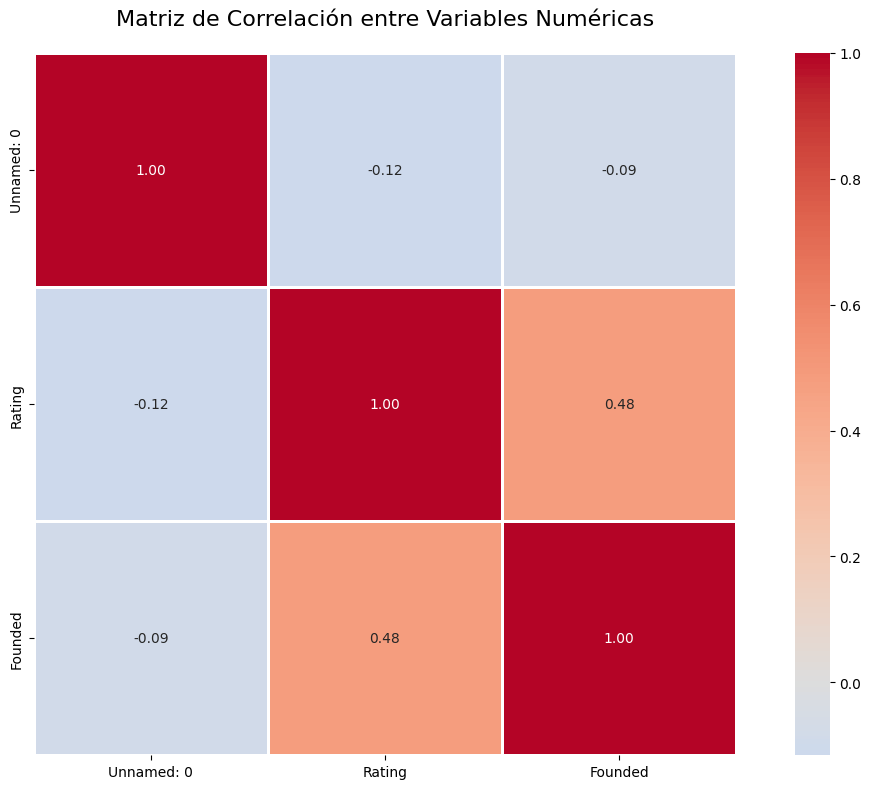

In [22]:
# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## 1.3 Visualización de Distribuciones


Objetivo: Crear gráficos para visualizar la distribución de las variables y detectar patrones, outliers o anomalías.



1. Histogramas de variables numéricas:
--------------------------------------------------------------------------------


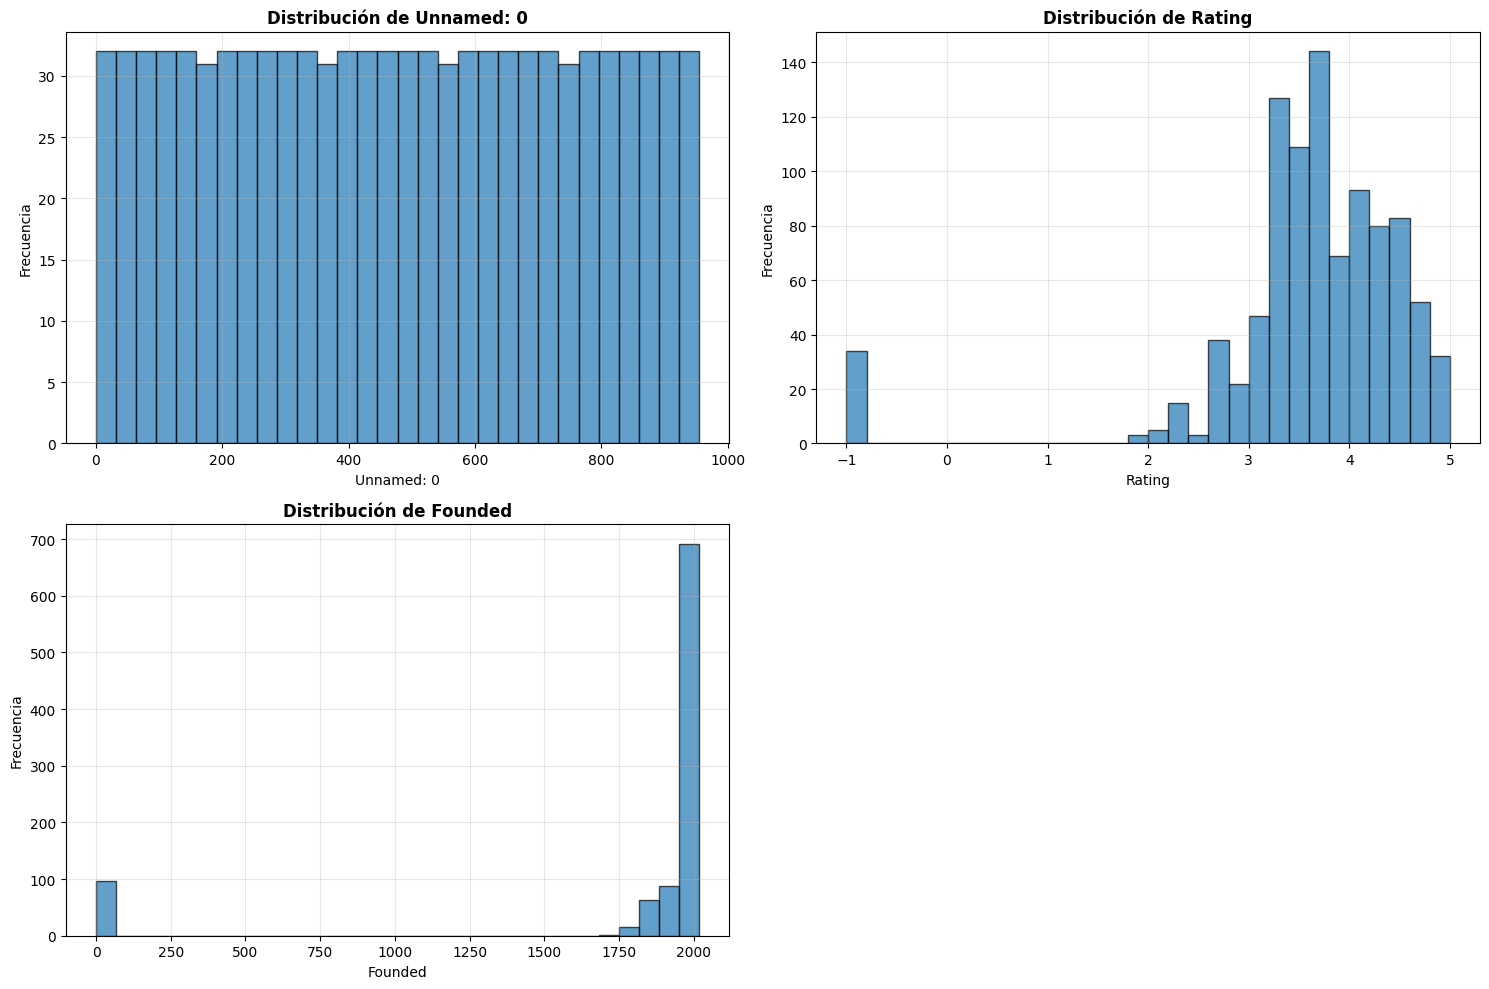

In [23]:
# A. Distribución de variables numéricas
print("\n1. Histogramas de variables numéricas:")
print("-" * 80)

num_cols = len(numerical_cols)
fig, axes = plt.subplots(nrows=(num_cols + 1) // 2, ncols=2, figsize=(15, 5 * ((num_cols + 1) // 2)))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(data[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, alpha=0.3)

# Ocultar ejes vacíos si hay número impar de columnas
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


2. Boxplots para detectar valores atípicos:
--------------------------------------------------------------------------------


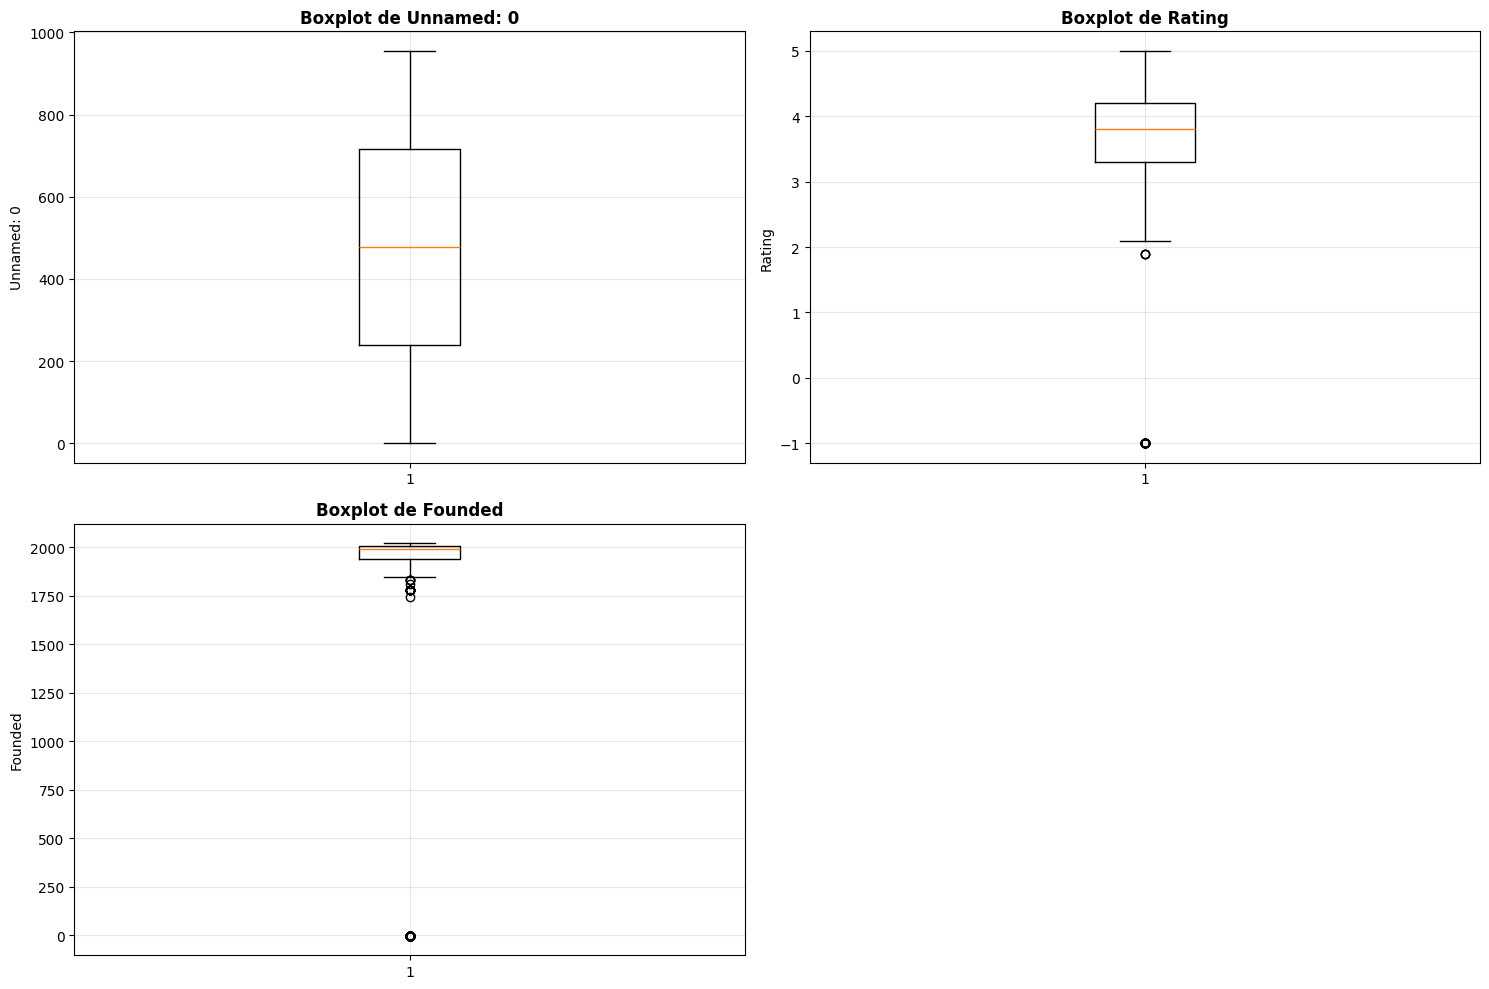

In [24]:
# B. Boxplots para detectar outliers
print("\n2. Boxplots para detectar valores atípicos:")
print("-" * 80)

fig, axes = plt.subplots(nrows=(num_cols + 1) // 2, ncols=2, figsize=(15, 5 * ((num_cols + 1) // 2)))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(data[col].dropna(), vert=True)
    axes[i].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

# Ocultar ejes vacíos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


3. Gráficos de densidad (KDE):
--------------------------------------------------------------------------------


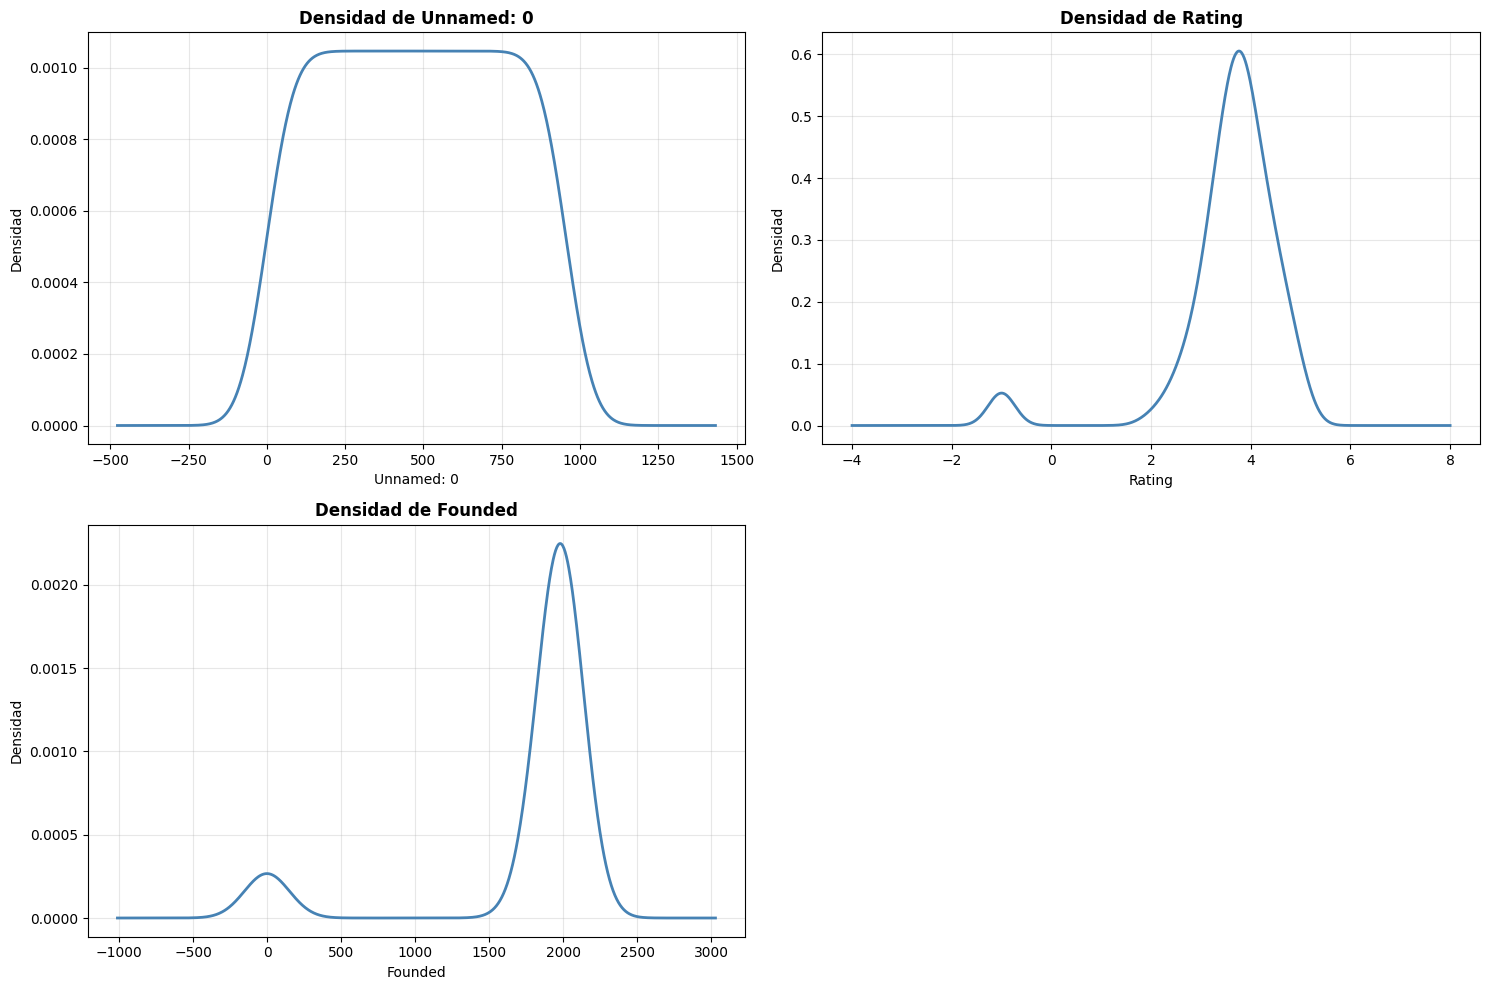

In [27]:
# C. Gráficos de densidad (KDE)
print("\n3. Gráficos de densidad (KDE):")
print("-" * 80)

fig, axes = plt.subplots(nrows=(num_cols + 1) // 2, ncols=2, figsize=(15, 5 * ((num_cols + 1) // 2)))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    data[col].dropna().plot(kind='density', ax=axes[i], color='steelblue', linewidth=2)
    axes[i].set_title(f'Densidad de {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Densidad')
    axes[i].grid(True, alpha=0.3)

# Ocultar ejes vacíos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()




4. Distribución de variables categóricas (Top 10):
--------------------------------------------------------------------------------


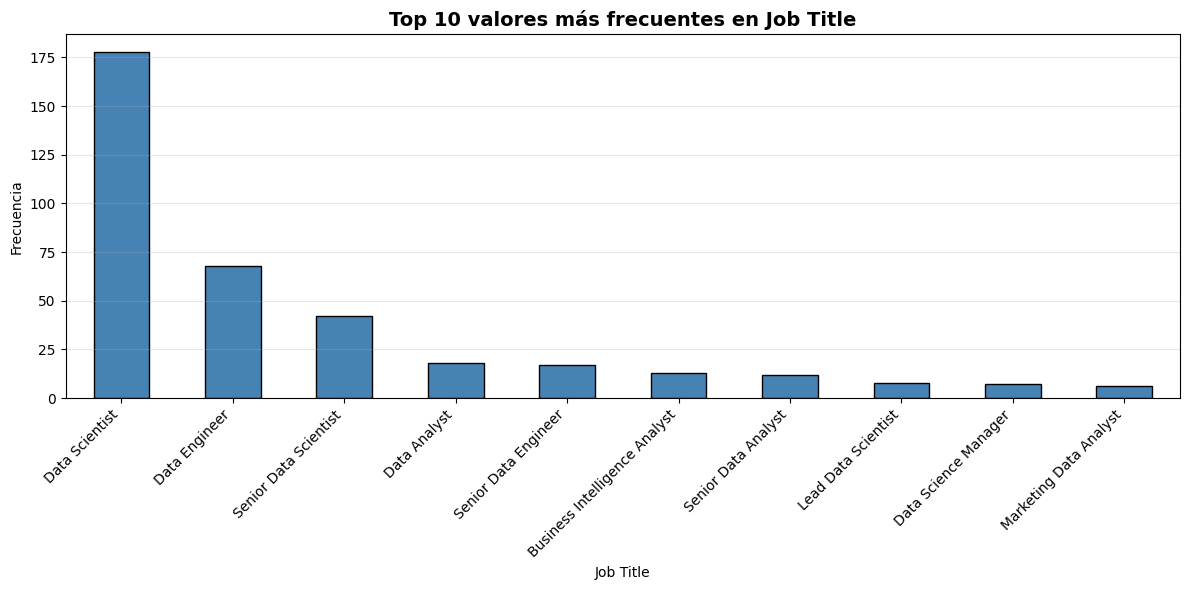

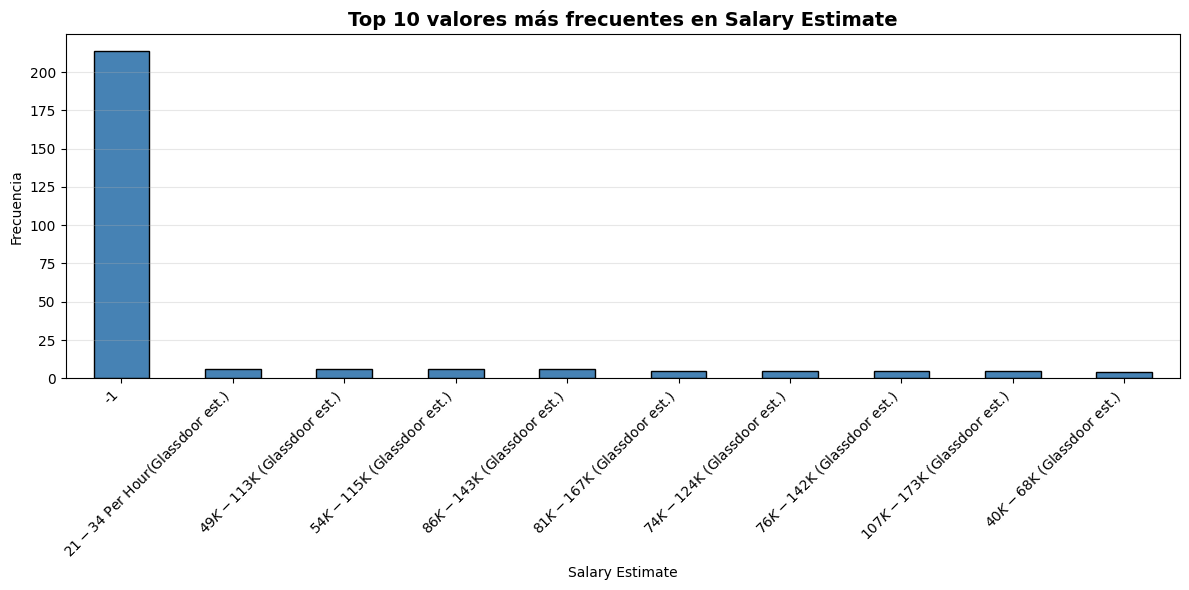

C:\Users\juanp\AppData\Local\Temp\ipykernel_38236\595394166.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


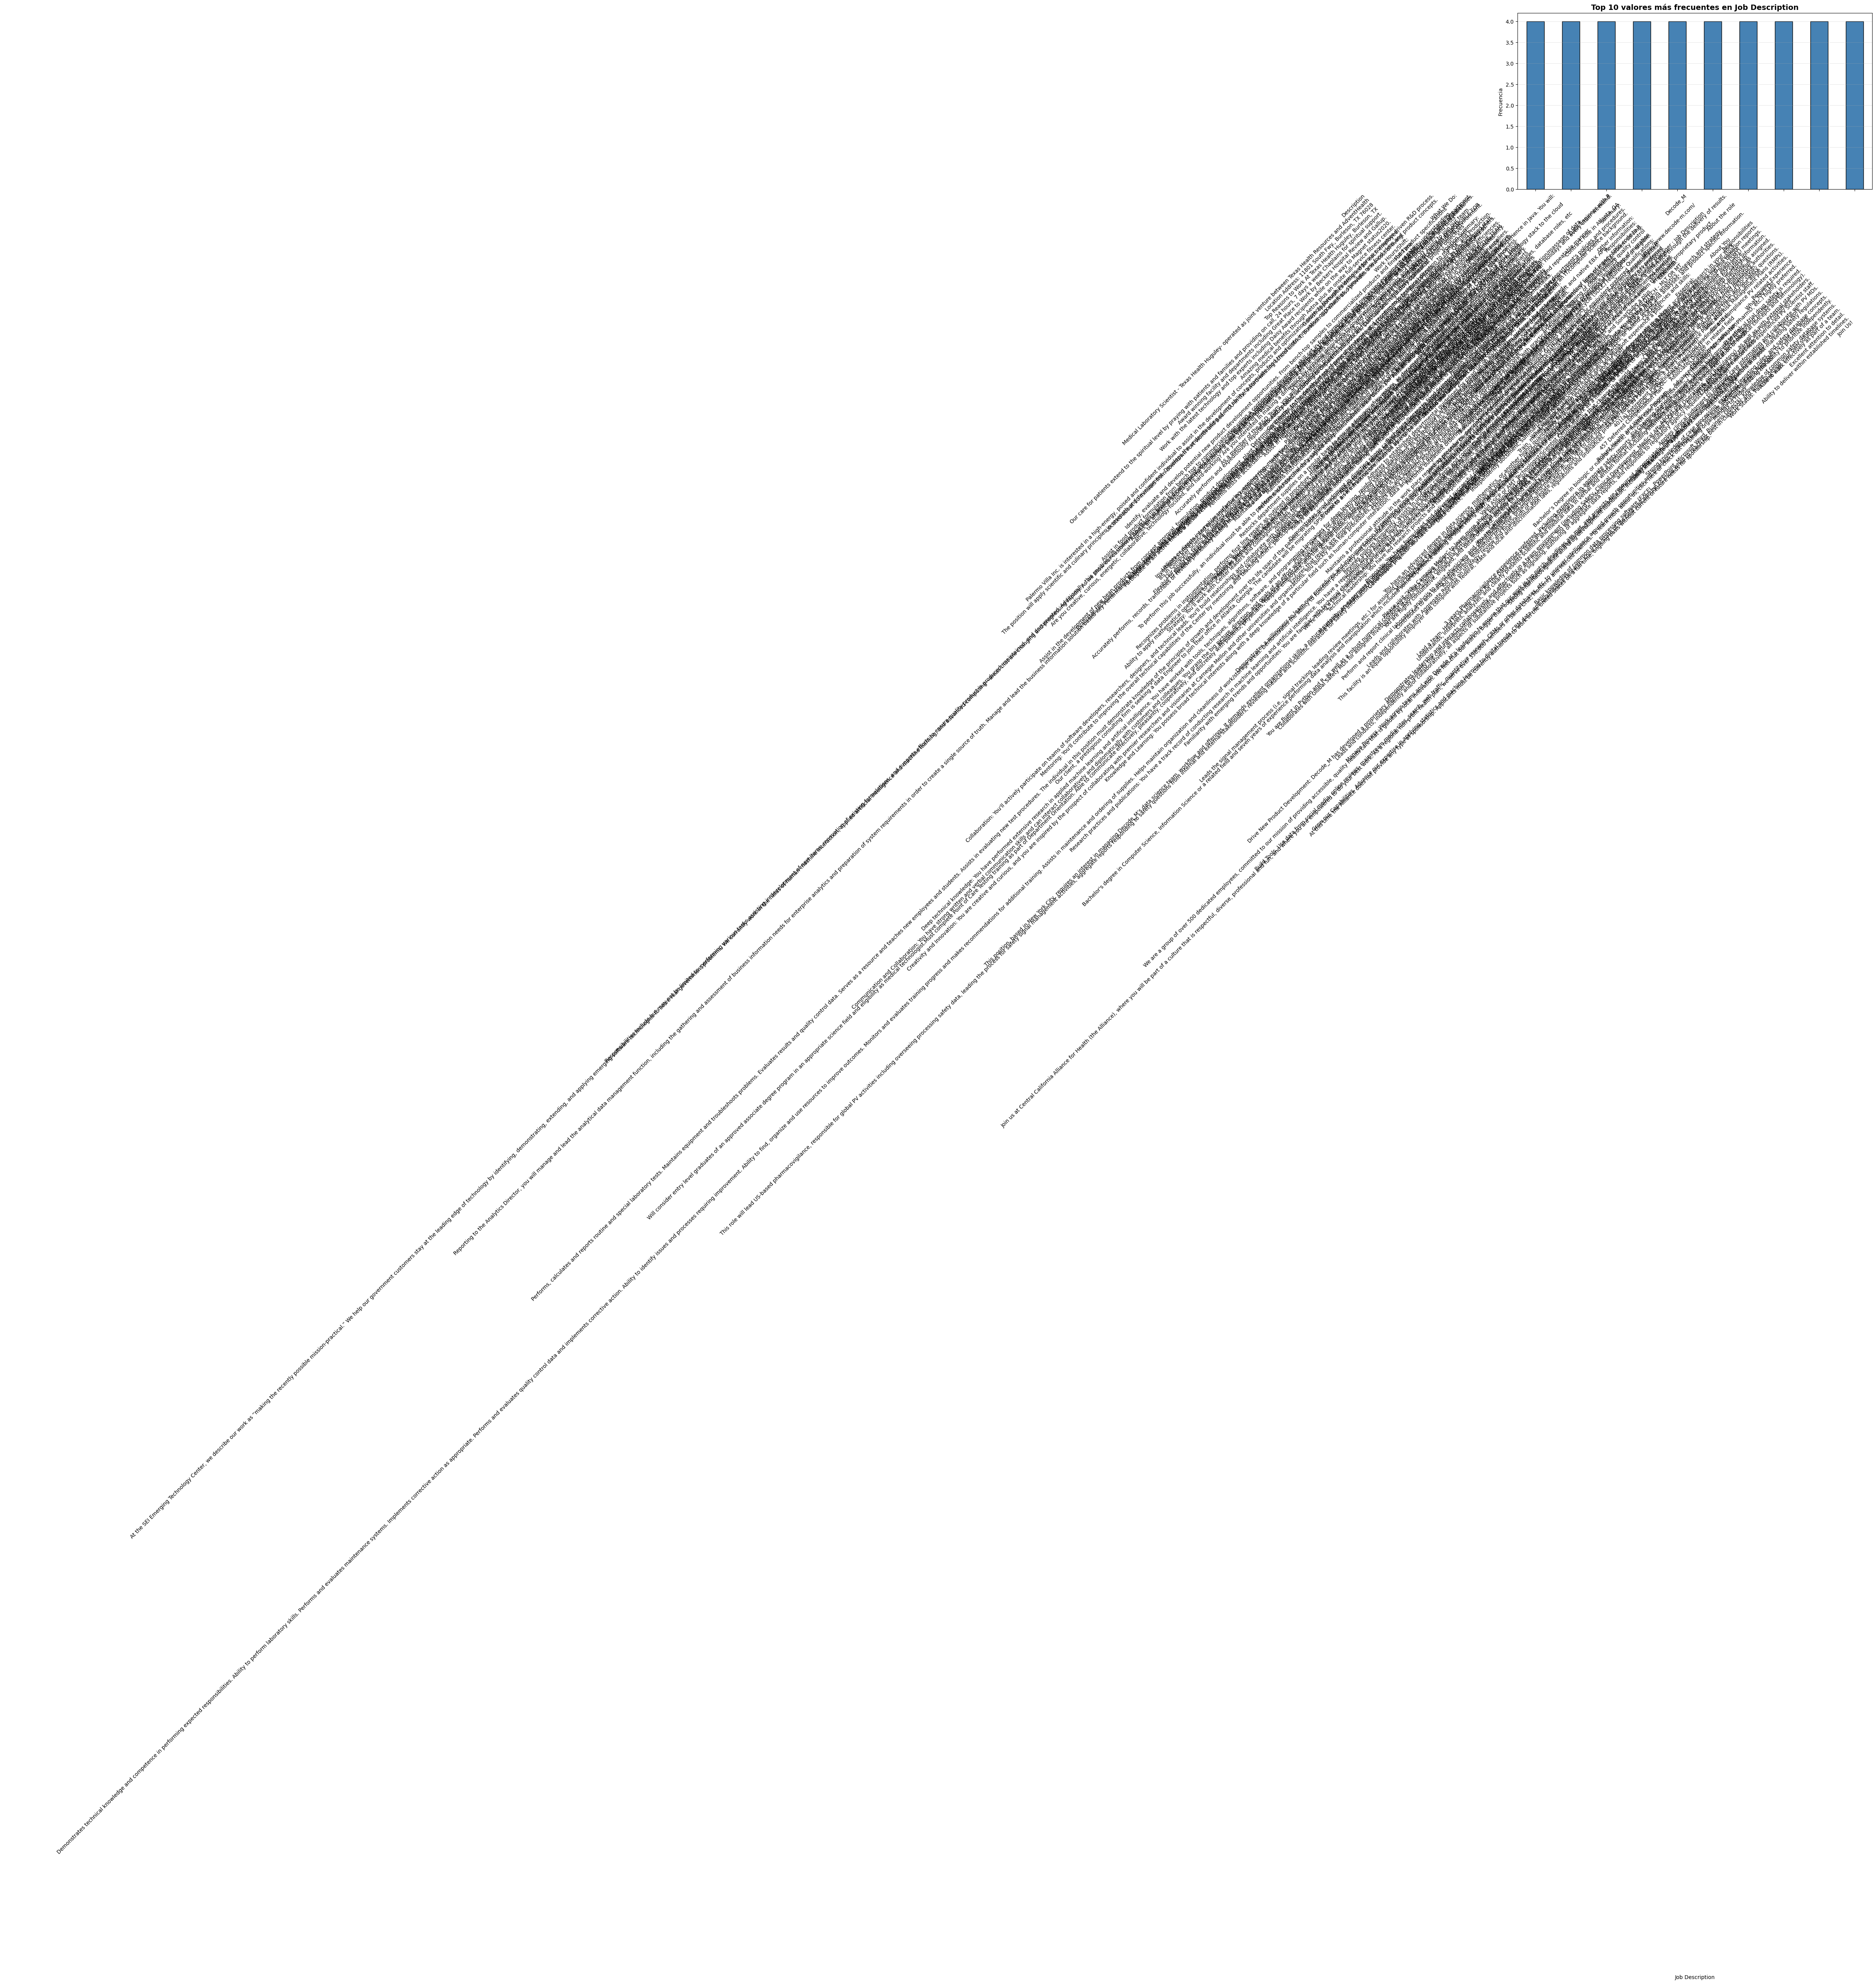

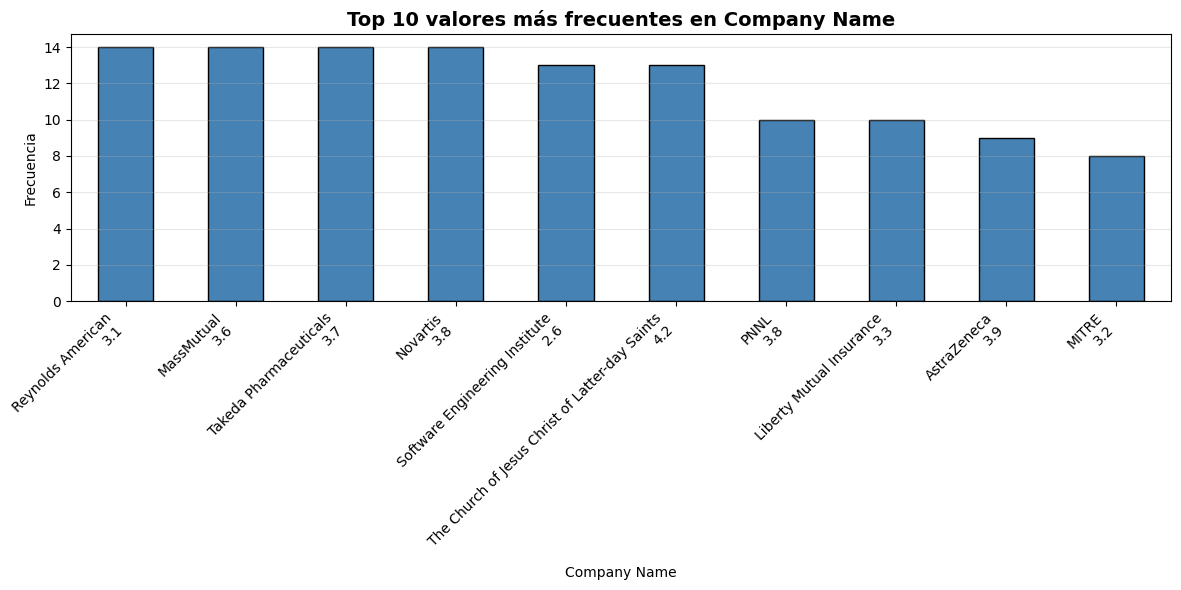

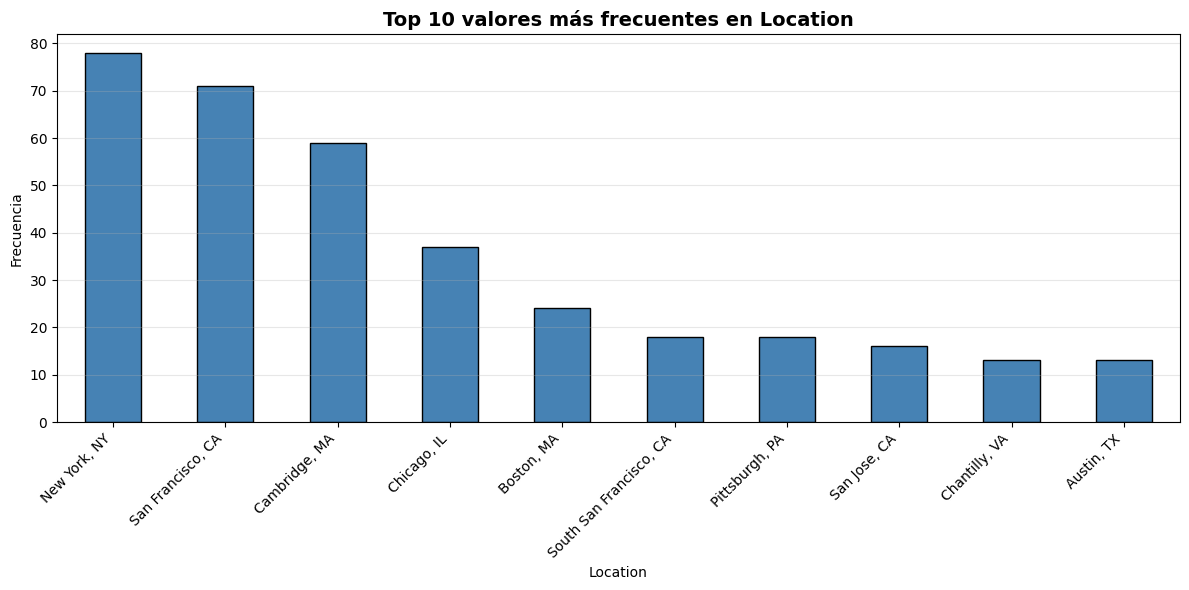

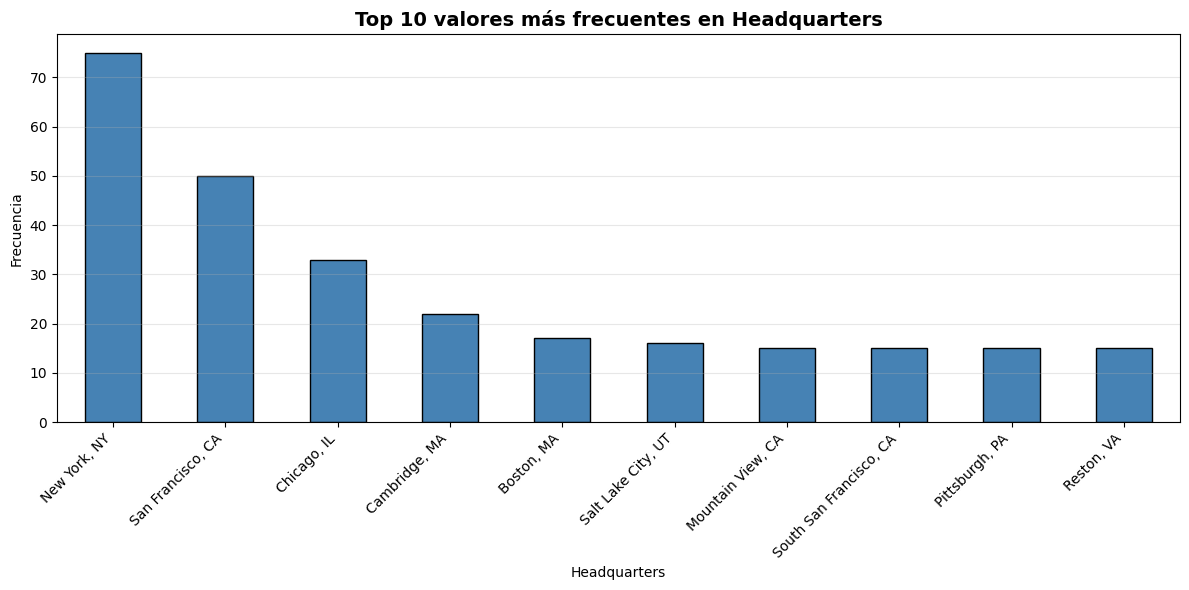

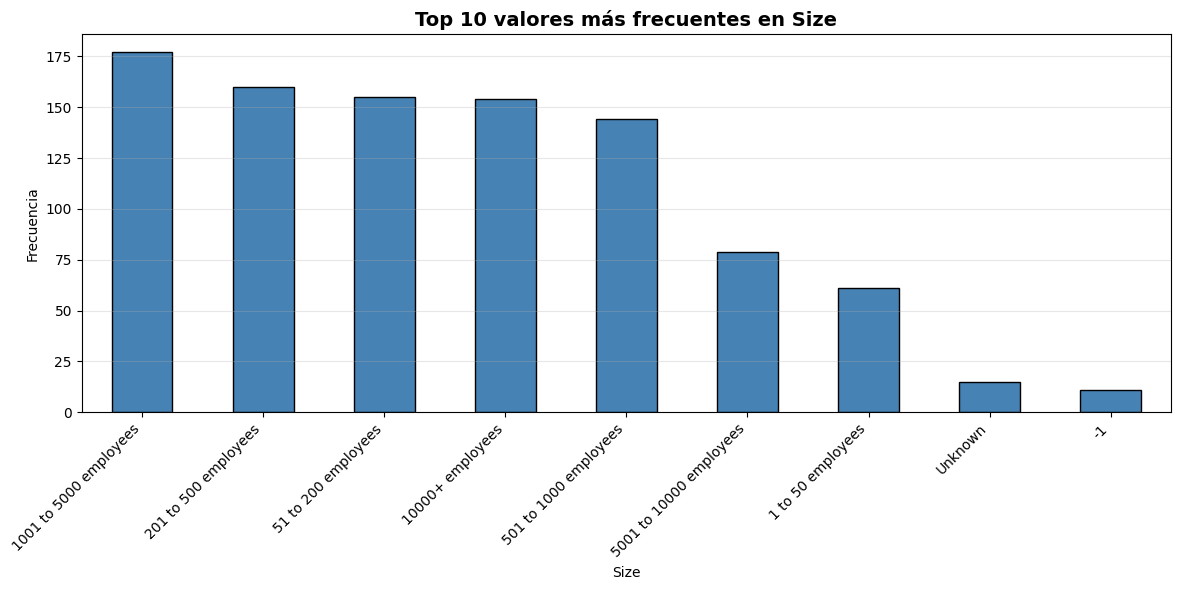

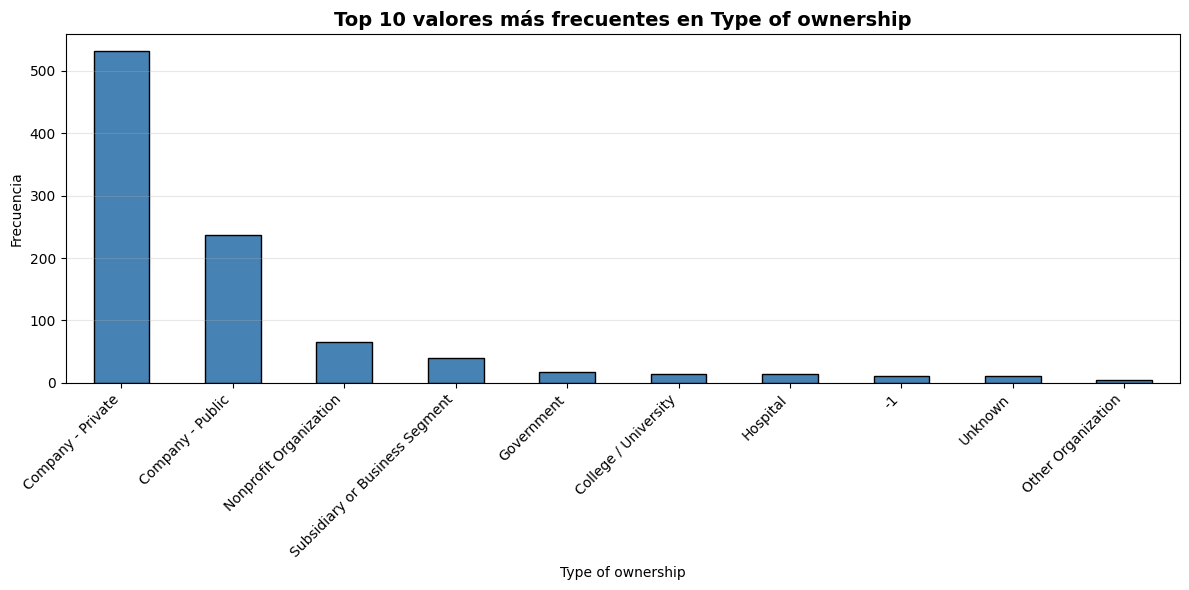

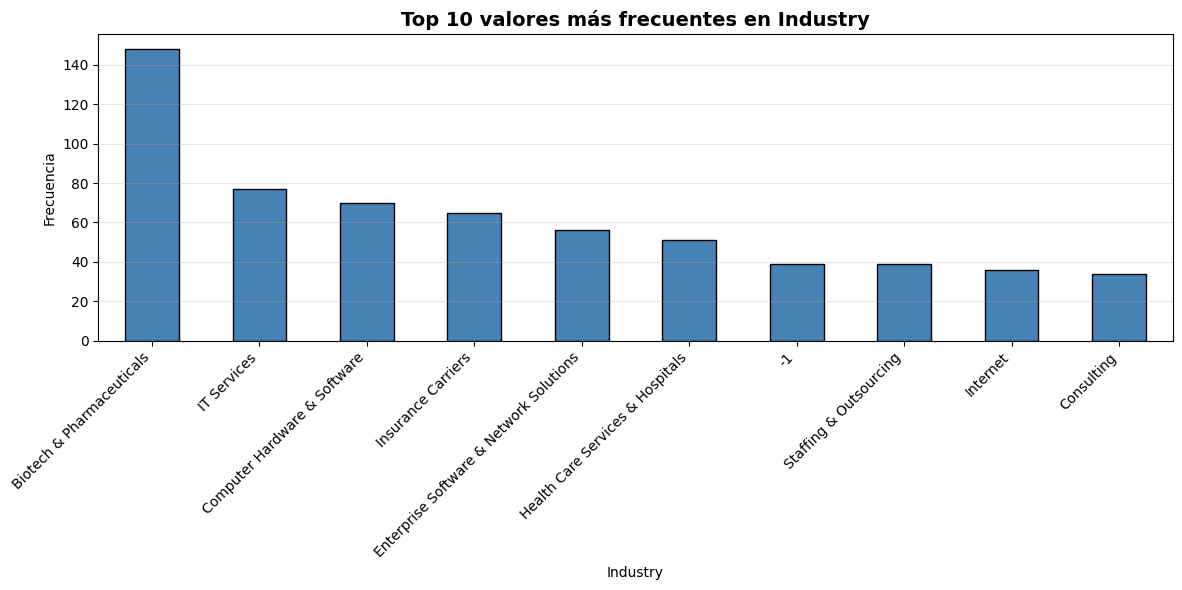

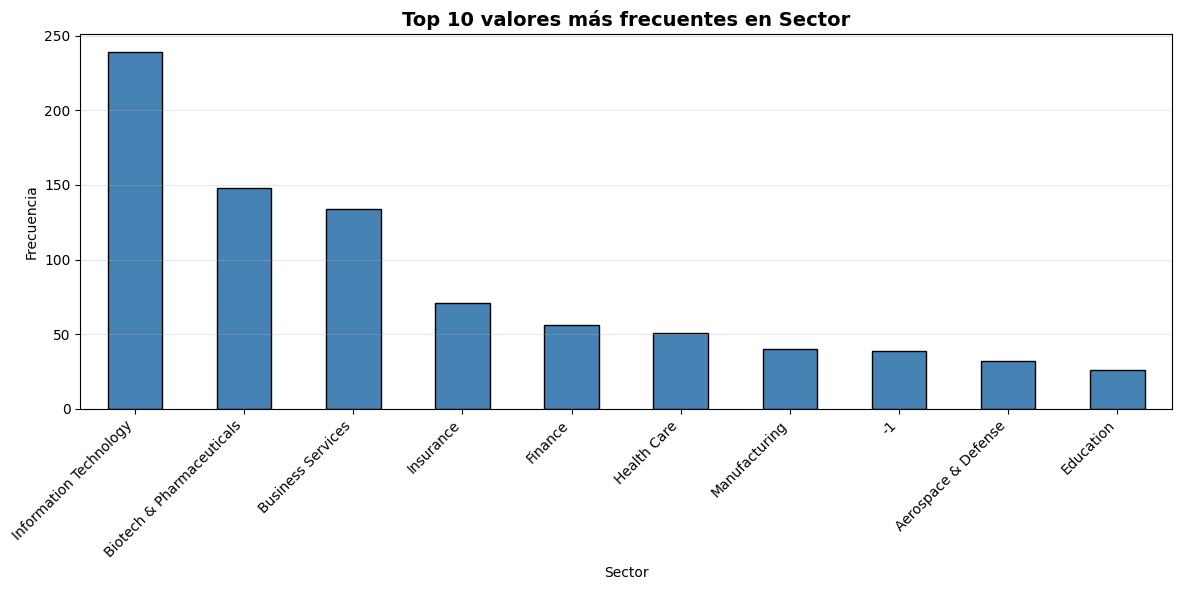

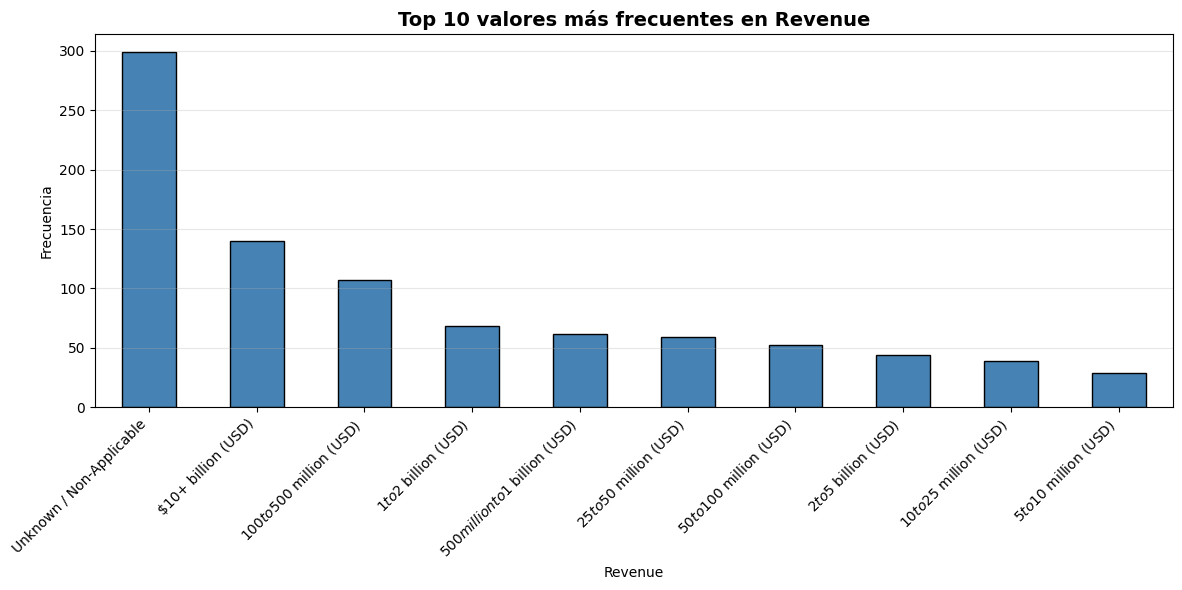

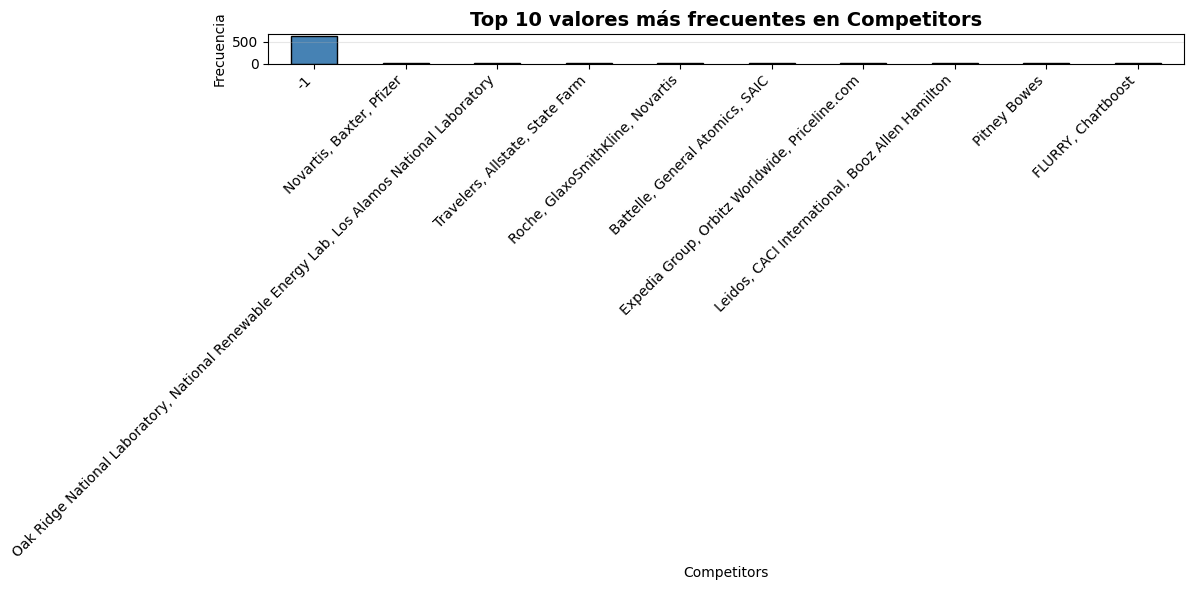

In [29]:
# D. Gráficos de barras para variables categóricas (top 10)
print("\n4. Distribución de variables categóricas (Top 10):")
print("-" * 80)

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    top_values = data[col].value_counts().head(10)
    top_values.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title(f'Top 10 valores más frecuentes en {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

## 1.4 Análisis de la Variable Objetivo

Objetivo: Analizar específicamente la variable que queremos predecir (salario) para entender su distribución y características.

In [32]:
# ============================================================================
# 1.4 ANÁLISIS DE LA VARIABLE OBJETIVO
# ============================================================================

print("\n" + "=" * 80)
print("ANÁLISIS DE LA VARIABLE OBJETIVO (SALARIO)")
print("=" * 80)

# Identificar la columna de salario
# Nota: Ajusta el nombre de la columna según tu dataset
# Posibles nombres: 'Salary', 'salary', 'Avg Salary(K)', etc.
salary_column = None
for col in data.columns:
    if 'salary' in col.lower() or 'sal' in col.lower():
        salary_column = col
        break

if salary_column is None:
    print("⚠️ No se encontró una columna de salario. Por favor, especifica manualmente.")
else:
    print(f"✓ Variable objetivo identificada: {salary_column}")
    print("-" * 80)
    
    # A. Estadísticas descriptivas del salario
    print("\n1. Estadísticas descriptivas del salario:")
    print("-" * 80)
    print(f"Conteo: {data[salary_column].count()}")
    print(f"Media: ${data[salary_column].mean():.2f}")
    print(f"Mediana: ${data[salary_column].median():.2f}")
    print(f"Moda: ${data[salary_column].mode()[0]:.2f}")
    print(f"Desviación estándar: ${data[salary_column].std():.2f}")
    print(f"Mínimo: ${data[salary_column].min():.2f}")
    print(f"Máximo: ${data[salary_column].max():.2f}")
    print(f"Rango: ${data[salary_column].max() - data[salary_column].min():.2f}")
    print(f"Q1 (25%): ${data[salary_column].quantile(0.25):.2f}")
    print(f"Q3 (75%): ${data[salary_column].quantile(0.75):.2f}")
    print(f"IQR: ${data[salary_column].quantile(0.75) - data[salary_column].quantile(0.25):.2f}")
    
    # B. Visualización múltiple del salario
    print("\n2. Visualizaciones de la distribución del salario:")
    print("-" * 80)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Histograma
    axes[0, 0].hist(data[salary_column].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0, 0].axvline(data[salary_column].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: ${data[salary_column].mean():.2f}')
    axes[0, 0].axvline(data[salary_column].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: ${data[salary_column].median():.2f}')
    axes[0, 0].set_title('Histograma de Salarios', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Salario')
    axes[0, 0].set_ylabel('Frecuencia')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Boxplot
    axes[0, 1].boxplot(data[salary_column].dropna(), vert=True)
    axes[0, 1].set_title('Boxplot de Salarios', fontsize=14, fontweight='bold')
    axes[0, 1].set_ylabel('Salario')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Densidad (KDE)
    data[salary_column].dropna().plot(kind='density', ax=axes[1, 0], color='steelblue', linewidth=2)
    axes[1, 0].set_title('Densidad de Salarios', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Salario')
    axes[1, 0].set_ylabel('Densidad')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Q-Q Plot para verificar normalidad
    from scipy import stats
    stats.probplot(data[salary_column].dropna(), dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot (Normalidad)', fontsize=14, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # C. Análisis de outliers en el salario
    print("\n3. Análisis de valores atípicos (outliers):")
    print("-" * 80)
    Q1 = data[salary_column].quantile(0.25)
    Q3 = data[salary_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[salary_column] < lower_bound) | (data[salary_column] > upper_bound)]
    print(f"Número de outliers detectados: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")
    print(f"Límite inferior: ${lower_bound:.2f}")
    print(f"Límite superior: ${upper_bound:.2f}")
    
    if len(outliers) > 0:
        print("\nPrimeros 10 outliers:")
        display(outliers[[salary_column]].head(10))
    
    # D. Relación del salario con otras variables numéricas
    print("\n4. Relación del salario con otras variables:")
    print("-" * 80)
    
    other_numerical = [col for col in numerical_cols if col != salary_column]
    
    if len(other_numerical) > 0:
        n_plots = len(other_numerical)
        fig, axes = plt.subplots(nrows=(n_plots + 1) // 2, ncols=2, figsize=(15, 5 * ((n_plots + 1) // 2)))
        axes = axes.flatten() if n_plots > 1 else [axes]
        
        for i, col in enumerate(other_numerical):
            axes[i].scatter(data[col], data[salary_column], alpha=0.5)
            axes[i].set_title(f'Salario vs {col}', fontsize=12, fontweight='bold')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Salario')
            axes[i].grid(True, alpha=0.3)
            
            # Calcular correlación
            corr = data[[col, salary_column]].corr().iloc[0, 1]
            axes[i].text(0.05, 0.95, f'Correlación: {corr:.3f}', 
                        transform=axes[i].transAxes, 
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                        verticalalignment='top')
        
        # Ocultar ejes vacíos
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')
        
        plt.tight_layout()
        plt.show()

# E. Resumen final
print("\n" + "=" * 80)
print("RESUMEN DEL ANÁLISIS EXPLORATORIO")
print("=" * 80)
print(f"\n📊 Dataset cargado exitosamente con {data.shape[0]} registros y {data.shape[1]} columnas")
print(f"📈 Variable objetivo: {salary_column if salary_column else 'No identificada'}")
print(f"🔢 Variables numéricas: {len(numerical_cols)}")
print(f"📝 Variables categóricas: {len(categorical_cols)}")
print(f"❌ Valores nulos totales: {data.isnull().sum().sum()}")
print("\n✓ Análisis exploratorio completado")


ANÁLISIS DE LA VARIABLE OBJETIVO (SALARIO)
✓ Variable objetivo identificada: Salary Estimate
--------------------------------------------------------------------------------

1. Estadísticas descriptivas del salario:
--------------------------------------------------------------------------------
Conteo: 956


TypeError: Could not convert string '$53K-$91K (Glassdoor est.)$63K-$112K (Glassdoor est.)$80K-$90K (Glassdoor est.)$56K-$97K (Glassdoor est.)$86K-$143K (Glassdoor est.)$71K-$119K (Glassdoor est.)$54K-$93K (Glassdoor est.)$86K-$142K (Glassdoor est.)$38K-$84K (Glassdoor est.)$120K-$160K (Glassdoor est.)$126K-$201K (Glassdoor est.)$64K-$106K (Glassdoor est.)$106K-$172K (Glassdoor est.)$46K-$85K (Glassdoor est.)$83K-$144K (Glassdoor est.)$102K-$190K (Glassdoor est.)$67K-$137K (Glassdoor est.)$118K-$189K (Glassdoor est.)$110K-$175K (Glassdoor est.)$64K-$111K (Glassdoor est.)$81K-$130K (Glassdoor est.)$73K-$119K (Glassdoor est.)$86K-$139K (Glassdoor est.)$63K-$105K (Glassdoor est.)-1$109K-$177K (Glassdoor est.)$63K-$110K (Glassdoor est.)$75K-$124K (Glassdoor est.)$34K-$61K (Glassdoor est.)$63K-$105K (Glassdoor est.)$80K-$90K (Glassdoor est.)$56K-$97K (Glassdoor est.)$72K-$120K (Glassdoor est.)$86K-$143K (Glassdoor est.)$93K-$149K (Glassdoor est.)$85K-$140K (Glassdoor est.)$77K-$135K (Glassdoor est.)$82K-$132K (Glassdoor est.)$83K-$137K (Glassdoor est.)$115K-$180K (Glassdoor est.)$74K-$138K (Glassdoor est.)$64K-$112K (Glassdoor est.)-1$68K-$129K (Glassdoor est.)$110K-$175K (Glassdoor est.)$52K-$113K (Glassdoor est.)$110K-$150K(Employer est.)-1Employer Provided Salary:$150K-$160K$158K-$211K (Glassdoor est.)$20K-$39K (Glassdoor est.)$56K-$117K (Glassdoor est.)$63K-$99K (Glassdoor est.)-1$68K-$114K (Glassdoor est.)$86K-$143K (Glassdoor est.)$41K-$95K (Glassdoor est.)$86K-$144K (Glassdoor est.)$80K-$139K (Glassdoor est.)$56K-$95K (Glassdoor est.)$120K-$189K (Glassdoor est.)$111K-$176K (Glassdoor est.)$54K-$93K (Glassdoor est.)$71K-$119K (Glassdoor est.)-1$82K-$132K (Glassdoor est.)$84K-$146K (Glassdoor est.)$107K-$172K (Glassdoor est.)$49K-$85K (Glassdoor est.)-1$61K-$109K (Glassdoor est.)-1$88K-$148K (Glassdoor est.)$60K-$99K (Glassdoor est.)-1$41K-$72K (Glassdoor est.)$96K-$161K (Glassdoor est.)$65K-$130K (Glassdoor est.)$52K-$81K (Glassdoor est.)$139K-$220K (Glassdoor est.)$50K-$102K (Glassdoor est.)$85K-$139K (Glassdoor est.)$74K-$122K (Glassdoor est.)$99K-$157K (Glassdoor est.)$79K-$222K (Glassdoor est.)$57K-$118K (Glassdoor est.)$83K-$137K (Glassdoor est.)$86K-$141K (Glassdoor est.)$94K-$154K (Glassdoor est.)$37K-$76K (Glassdoor est.)$100K-$160K (Glassdoor est.)$55K-$100K (Glassdoor est.)$60K-$114K (Glassdoor est.)$39K-$68K (Glassdoor est.)$106K-$172K (Glassdoor est.)$86K-$142K (Glassdoor est.)$64K-$107K (Glassdoor est.)$31K-$65K (Glassdoor est.)-1$34K-$62K (Glassdoor est.)-1$117K-$231K (Glassdoor est.)$64K-$106K (Glassdoor est.)-1$79K-$134K (Glassdoor est.)$52K-$93K (Glassdoor est.)$55K-$116K (Glassdoor est.)$72K-$123K (Glassdoor est.)$74K-$124K (Glassdoor est.)$40K-$73K (Glassdoor est.)$102K-$164K (Glassdoor est.)-1$89K-$153K (Glassdoor est.)$61K-$110K (Glassdoor est.)-1-1$65K-$110K (Glassdoor est.)$200K-$275K(Employer est.)$68K-$123K (Glassdoor est.)$80K-$129K (Glassdoor est.)$41K-$72K (Glassdoor est.)-1$39K-$71K (Glassdoor est.)$38K-$85K (Glassdoor est.)$121K-$193K (Glassdoor est.)$54K-$102K (Glassdoor est.)$83K-$144K (Glassdoor est.)$120K-$160K (Glassdoor est.)$102K-$163K (Glassdoor est.)$76K-$140K (Glassdoor est.)$60K-$101K (Glassdoor est.)$82K-$133K (Glassdoor est.)$65K-$125K (Glassdoor est.)-1-1-1$91K-$148K (Glassdoor est.)$95K-$173K (Glassdoor est.)$77K-$124K (Glassdoor est.)$80K-$135K (Glassdoor est.)$85K-$159K (Glassdoor est.)$80K-$105K(Employer est.)$43K-$81K (Glassdoor est.)$29K-$50K (Glassdoor est.)-1$82K-$133K (Glassdoor est.)$26K-$55K (Glassdoor est.)$61K-$118K (Glassdoor est.)$60K-$102K (Glassdoor est.)-1$112K-$182K (Glassdoor est.)-1$64K-$106K (Glassdoor est.)$51K-$112K (Glassdoor est.)$113K-$223K (Glassdoor est.)-1$72K-$129K (Glassdoor est.)$71K-$123K (Glassdoor est.)$64K-$106K (Glassdoor est.)$118K-$189K (Glassdoor est.)-1Employer Provided Salary:$120K-$145K$80K-$120K (Glassdoor est.)-1$80K-$130K (Glassdoor est.)-1$59K-$115K (Glassdoor est.)$71K-$136K (Glassdoor est.)$81K-$167K (Glassdoor est.)$49K-$85K (Glassdoor est.)$60K-$114K (Glassdoor est.)$71K-$204K (Glassdoor est.)$75K-$125K (Glassdoor est.)-1$77K-$136K (Glassdoor est.)$74K-$123K (Glassdoor est.)-1$44K-$78K (Glassdoor est.)$65K-$148K (Glassdoor est.)$59K-$110K (Glassdoor est.)$85K-$134K (Glassdoor est.)$124K-$204K (Glassdoor est.)$131K-$207K (Glassdoor est.)$110K-$174K (Glassdoor est.)-1$52K-$101K (Glassdoor est.)-1$81K-$133K (Glassdoor est.)$132K-$211K (Glassdoor est.)-1$73K-$119K (Glassdoor est.)$110K-$175K (Glassdoor est.)$74K-$140K (Glassdoor est.)$100K-$190K (Glassdoor est.)$43K-$80K (Glassdoor est.)-1-1$17-$24 Per Hour(Glassdoor est.)$91K-$149K (Glassdoor est.)$42K-$82K (Glassdoor est.)$116K-$185K (Glassdoor est.)$59K-$116K (Glassdoor est.)$48K-$95K (Glassdoor est.)$31K-$72K (Glassdoor est.)$105K-$198K (Glassdoor est.)$55K-$100K (Glassdoor est.)$98K-$182K (Glassdoor est.)$73K-$124K (Glassdoor est.)Employer Provided Salary:$200K-$250K$21-$34 Per Hour(Glassdoor est.)$117K-$206K (Glassdoor est.)$111K-$183K (Glassdoor est.)$44K-$78K (Glassdoor est.)$81K-$159K (Glassdoor est.)-1$83K-$166K (Glassdoor est.)$114K-$182K (Glassdoor est.)$42K-$76K (Glassdoor est.)-1-1-1$114K-$179K (Glassdoor est.)-1$60K-$123K (Glassdoor est.)$100K-$166K (Glassdoor est.)$108K-$173K (Glassdoor est.)$48K-$93K (Glassdoor est.)-1$54K-$115K (Glassdoor est.)$60K-$127K (Glassdoor est.)$90K-$179K (Glassdoor est.)-1-1$138K-$224K (Glassdoor est.)$54K-$115K (Glassdoor est.)$190K-$220K(Employer est.)-1-1-1$35K-$62K (Glassdoor est.)$18-$25 Per Hour(Glassdoor est.)-1$39K-$66K (Glassdoor est.)$81K-$167K (Glassdoor est.)-1$42K-$86K (Glassdoor est.)$69K-$127K (Glassdoor est.)$21-$34 Per Hour(Glassdoor est.)$40K-$68K (Glassdoor est.)-1$49K-$113K (Glassdoor est.)$75K-$140K (Glassdoor est.)-1$86K-$139K (Glassdoor est.)$66K-$112K (Glassdoor est.)$76K-$125K (Glassdoor est.)$44K-$86K (Glassdoor est.)$15-$25 Per Hour(Glassdoor est.)$53K-$92K (Glassdoor est.)$44K-$78K (Glassdoor est.)$85K-$134K (Glassdoor est.)-1$59K-$110K (Glassdoor est.)$64K-$111K (Glassdoor est.)$65K-$120K (Glassdoor est.)$60K-$103K (Glassdoor est.)$53K-$105K (Glassdoor est.)$124K-$204K (Glassdoor est.)$131K-$207K (Glassdoor est.)$110K-$174K (Glassdoor est.)$33K-$62K (Glassdoor est.)-1-1$52K-$101K (Glassdoor est.)$48K-$90K (Glassdoor est.)$34K-$64K (Glassdoor est.)$132K-$211K (Glassdoor est.)$81K-$133K (Glassdoor est.)$42K-$76K (Glassdoor est.)-1-1$66K-$111K (Glassdoor est.)$74K-$140K (Glassdoor est.)-1$63K-$110K (Glassdoor est.)$63K-$105K (Glassdoor est.)-1-1$91K-$138K (Glassdoor est.)$100K-$190K (Glassdoor est.)$62K-$114K (Glassdoor est.)$71K-$129K (Glassdoor est.)$43K-$80K (Glassdoor est.)$74K-$119K (Glassdoor est.)-1$55K-$97K (Glassdoor est.)$15K-$16K(Employer est.)-1-1$61K-$106K (Glassdoor est.)$91K-$149K (Glassdoor est.)-1$127K-$199K (Glassdoor est.)-1-1$74K-$126K (Glassdoor est.)$33K-$72K (Glassdoor est.)$17-$24 Per Hour(Glassdoor est.)$37K-$63K (Glassdoor est.)$67K-$119K (Glassdoor est.)$72K-$117K (Glassdoor est.)$116K-$185K (Glassdoor est.)$78K-$126K (Glassdoor est.)$42K-$82K (Glassdoor est.)$59K-$116K (Glassdoor est.)-1$63K-$105K (Glassdoor est.)$109K-$177K (Glassdoor est.)$116K-$194K (Glassdoor est.)$48K-$95K (Glassdoor est.)$83K-$133K (Glassdoor est.)-1$105K-$198K (Glassdoor est.)$31K-$72K (Glassdoor est.)$98K-$182K (Glassdoor est.)$55K-$100K (Glassdoor est.)$45K-$82K (Glassdoor est.)-1$83K-$135K (Glassdoor est.)-1$70K-$122K (Glassdoor est.)Employer Provided Salary:$200K-$250K$70K-$132K (Glassdoor est.)$73K-$124K (Glassdoor est.)$54K-$101K (Glassdoor est.)$117K-$206K (Glassdoor est.)-1$21-$34 Per Hour(Glassdoor est.)-1$111K-$183K (Glassdoor est.)-1$68K-$112K (Glassdoor est.)$42K-$74K (Glassdoor est.)-1$44K-$78K (Glassdoor est.)-1$81K-$159K (Glassdoor est.)$95K-$161K (Glassdoor est.)$75K-$124K (Glassdoor est.)$72K-$120K (Glassdoor est.)$76K-$126K (Glassdoor est.)$114K-$182K (Glassdoor est.)$108K-$176K (Glassdoor est.)$130K-$208K (Glassdoor est.)$83K-$166K (Glassdoor est.)$42K-$76K (Glassdoor est.)$37K-$68K (Glassdoor est.)$52K-$99K (Glassdoor est.)$105K-$173K (Glassdoor est.)-1-1-1$71K-$134K (Glassdoor est.)-1$39K-$82K (Glassdoor est.)-1$114K-$179K (Glassdoor est.)$88K-$162K (Glassdoor est.)$60K-$102K (Glassdoor est.)$100K-$166K (Glassdoor est.)$55K-$99K (Glassdoor est.)$67K-$117K (Glassdoor est.)$92K-$150K (Glassdoor est.)-1-1$116K-$209K (Glassdoor est.)$38K-$82K (Glassdoor est.)Employer Provided Salary:$85K-$90K-1$62K-$119K (Glassdoor est.)$86K-$143K (Glassdoor est.)$93K-$149K (Glassdoor est.)$84K-$136K (Glassdoor est.)$60K-$123K (Glassdoor est.)$52K-$89K (Glassdoor est.)-1$48K-$93K (Glassdoor est.)$56K-$97K (Glassdoor est.)$65K-$119K (Glassdoor est.)-1$108K-$173K (Glassdoor est.)$63K-$101K (Glassdoor est.)$54K-$115K (Glassdoor est.)-1$90K-$179K (Glassdoor est.)-1$127K-$202K (Glassdoor est.)$31K-$57K (Glassdoor est.)$60K-$127K (Glassdoor est.)$75K-$143K (Glassdoor est.)$105K-$194K (Glassdoor est.)$45K-$86K (Glassdoor est.)-1$95K-$154K (Glassdoor est.)-1-1$80K-$148K (Glassdoor est.)$36K-$62K (Glassdoor est.)-1$54K-$115K (Glassdoor est.)$50K-$92K (Glassdoor est.)$67K-$135K (Glassdoor est.)$82K-$132K (Glassdoor est.)$85K-$140K (Glassdoor est.)$138K-$224K (Glassdoor est.)$42K-$80K (Glassdoor est.)$190K-$220K(Employer est.)$68K-$139K (Glassdoor est.)-1$34K-$92K (Glassdoor est.)$54K-$71K (Glassdoor est.)$65K-$124K (Glassdoor est.)-1-1-1$35K-$62K (Glassdoor est.)$109K-$200K (Glassdoor est.)$18-$25 Per Hour(Glassdoor est.)$61K-$113K (Glassdoor est.)$39K-$66K (Glassdoor est.)$43K-$86K (Glassdoor est.)$74K-$149K (Glassdoor est.)-1$113K-$196K (Glassdoor est.)$81K-$167K (Glassdoor est.)$97K-$160K (Glassdoor est.)-1$24-$39 Per Hour(Glassdoor est.)-1-1-1-1$42K-$86K (Glassdoor est.)$69K-$127K (Glassdoor est.)$110K-$175K (Glassdoor est.)-1$102K-$172K (Glassdoor est.)$74K-$124K (Glassdoor est.)$40K-$68K (Glassdoor est.)$108K-$171K (Glassdoor est.)$76K-$142K (Glassdoor est.)-1$202K-$306K (Glassdoor est.)-1$49K-$97K (Glassdoor est.)$49K-$113K (Glassdoor est.)$21-$34 Per Hour(Glassdoor est.)-1$65K-$134K (Glassdoor est.)$32K-$59K (Glassdoor est.)-1$87K-$158K (Glassdoor est.)$107K-$173K (Glassdoor est.)$56K-$99K (Glassdoor est.)Employer Provided Salary:$25-$28 Per Hour-1$80K-$155K (Glassdoor est.)$43K-$98K (Glassdoor est.)$45K-$78K (Glassdoor est.)$44K-$96K (Glassdoor est.)$50K-$110K (Glassdoor est.)$61K-$119K (Glassdoor est.)Employer Provided Salary:$100K-$140K$56K-$91K (Glassdoor est.)-1-1$68K-$114K (Glassdoor est.)Employer Provided Salary:$150K-$160K-1$101K-$158K (Glassdoor est.)-1-1$125K-$210K (Glassdoor est.)$43K-$77K (Glassdoor est.)-1$139K-$221K (Glassdoor est.)$44K-$86K (Glassdoor est.)$78K-$147K (Glassdoor est.)$65K-$110K (Glassdoor est.)$37K-$66K (Glassdoor est.)$38K-$64K (Glassdoor est.)$43K-$82K (Glassdoor est.)$90K-$110K(Employer est.)$61K-$109K (Glassdoor est.)$93K-$151K (Glassdoor est.)$52K-$81K (Glassdoor est.)$40K-$101K (Glassdoor est.)$97K-$180K (Glassdoor est.)$81K-$134K (Glassdoor est.)$84K-$157K (Glassdoor est.)$49K-$113K (Glassdoor est.)$68K-$139K (Glassdoor est.)$75K-$140K (Glassdoor est.)-1-1$121K-$203K (Glassdoor est.)$52K-$85K (Glassdoor est.)$81K-$140K (Glassdoor est.)$63K-$99K (Glassdoor est.)$110K-$150K(Employer est.)$83K-$148K (Glassdoor est.)-1$60K-$101K (Glassdoor est.)-1-1-1$31K-$55K (Glassdoor est.)$102K-$178K (Glassdoor est.)Employer Provided Salary:$110K-$130K$48K-$85K (Glassdoor est.)$66K-$123K (Glassdoor est.)$92K-$146K (Glassdoor est.)$21-$29 Per Hour(Glassdoor est.)$10-$17 Per Hour(Glassdoor est.)$150K-$239K (Glassdoor est.)$52K-$91K (Glassdoor est.)$82K-$129K(Employer est.)-1$47K-$101K (Glassdoor est.)-1$49K-$76K (Glassdoor est.)-1$43K-$88K (Glassdoor est.)$124K-$199K (Glassdoor est.)$52K-$93K (Glassdoor est.)$97K-$181K (Glassdoor est.)-1$100K-$173K (Glassdoor est.)$53K-$96K (Glassdoor est.)$65K-$96K (Glassdoor est.)$56K-$95K (Glassdoor est.)$111K-$176K (Glassdoor est.)$75K-$127K (Glassdoor est.)$65K-$119K (Glassdoor est.)$56K-$97K (Glassdoor est.)$108K-$173K (Glassdoor est.)$94K-$139K (Glassdoor est.)-1$176K-$289K (Glassdoor est.)$92K-$149K (Glassdoor est.)$63K-$101K (Glassdoor est.)-1$54K-$115K (Glassdoor est.)-1$118K-$188K (Glassdoor est.)$108K-$146K (Glassdoor est.)$65K-$106K (Glassdoor est.)$55K-$98K (Glassdoor est.)$94K-$162K (Glassdoor est.)-1$63K-$120K (Glassdoor est.)$90K-$179K (Glassdoor est.)$127K-$202K (Glassdoor est.)$60K-$127K (Glassdoor est.)-1$31K-$57K (Glassdoor est.)$105K-$194K (Glassdoor est.)$45K-$86K (Glassdoor est.)$75K-$143K (Glassdoor est.)-1$126K-$228K (Glassdoor est.)-1$80K-$134K (Glassdoor est.)$120K-$189K (Glassdoor est.)-1$85K-$142K (Glassdoor est.)$95K-$154K (Glassdoor est.)$111K-$176K (Glassdoor est.)$87K-$140K (Glassdoor est.)$76K-$127K (Glassdoor est.)$54K-$92K (Glassdoor est.)-1$61K-$100K (Glassdoor est.)$81K-$140K (Glassdoor est.)-1$80K-$148K (Glassdoor est.)$108K-$171K (Glassdoor est.)$112K-$179K (Glassdoor est.)$63K-$111K (Glassdoor est.)$75K-$126K (Glassdoor est.)$110K-$184K (Glassdoor est.)$76K-$145K (Glassdoor est.)-1-1$36K-$62K (Glassdoor est.)$70K-$118K (Glassdoor est.)-1$94K-$153K (Glassdoor est.)-1$54K-$115K (Glassdoor est.)$50K-$92K (Glassdoor est.)$49K-$97K (Glassdoor est.)$67K-$135K (Glassdoor est.)$138K-$224K (Glassdoor est.)$80K-$139K (Glassdoor est.)$158K-$211K (Glassdoor est.)$150K-$180K (Glassdoor est.)$42K-$80K (Glassdoor est.)$190K-$220K(Employer est.)$42K-$77K (Glassdoor est.)$68K-$139K (Glassdoor est.)-1-1$54K-$71K (Glassdoor est.)$34K-$92K (Glassdoor est.)-1$47K-$85K (Glassdoor est.)$65K-$124K (Glassdoor est.)-1$56K-$95K (Glassdoor est.)-1-1$62K-$112K (Glassdoor est.)$107K-$173K (Glassdoor est.)$64K-$108K (Glassdoor est.)$89K-$144K (Glassdoor est.)-1$109K-$200K (Glassdoor est.)-1$61K-$113K (Glassdoor est.)$35K-$62K (Glassdoor est.)$55K-$105K (Glassdoor est.)$18-$25 Per Hour(Glassdoor est.)$39K-$66K (Glassdoor est.)$135K-$211K (Glassdoor est.)$57K-$80K (Glassdoor est.)$129K-$215K (Glassdoor est.)$86K-$143K (Glassdoor est.)$63K-$127K (Glassdoor est.)$50K-$89K (Glassdoor est.)$43K-$86K (Glassdoor est.)-1$74K-$149K (Glassdoor est.)$71K-$124K (Glassdoor est.)$113K-$196K (Glassdoor est.)$81K-$167K (Glassdoor est.)$69K-$121K (Glassdoor est.)$97K-$160K (Glassdoor est.)$150K-$238K (Glassdoor est.)-1-1$77K-$132K (Glassdoor est.)$24-$39 Per Hour(Glassdoor est.)$59K-$112K (Glassdoor est.)$35K-$65K (Glassdoor est.)$79K-$147K (Glassdoor est.)-1-1$62K-$119K (Glassdoor est.)-1$119K-$187K (Glassdoor est.)$90K-$157K (Glassdoor est.)$32K-$62K (Glassdoor est.)$42K-$86K (Glassdoor est.)$116K-$208K (Glassdoor est.)$102K-$172K (Glassdoor est.)$69K-$127K (Glassdoor est.)-1$86K-$144K (Glassdoor est.)$102K-$165K (Glassdoor est.)$74K-$124K (Glassdoor est.)$40K-$68K (Glassdoor est.)$76K-$142K (Glassdoor est.)$76K-$142K (Glassdoor est.)$108K-$171K (Glassdoor est.)$202K-$306K (Glassdoor est.)$91K-$159K (Glassdoor est.)-1$80K-$133K (Glassdoor est.)$49K-$97K (Glassdoor est.)-1$49K-$113K (Glassdoor est.)$21-$34 Per Hour(Glassdoor est.)$65K-$134K (Glassdoor est.)-1$32K-$59K (Glassdoor est.)-1$39K-$69K (Glassdoor est.)$87K-$158K (Glassdoor est.)$27K-$48K (Glassdoor est.)$36K-$71K (Glassdoor est.)$107K-$173K (Glassdoor est.)$56K-$99K (Glassdoor est.)-1Employer Provided Salary:$25-$28 Per Hour$80K-$155K (Glassdoor est.)$43K-$98K (Glassdoor est.)$44K-$96K (Glassdoor est.)$45K-$78K (Glassdoor est.)$50K-$110K (Glassdoor est.)$60K-$99K (Glassdoor est.)$130K-$206K (Glassdoor est.)$61K-$119K (Glassdoor est.)Employer Provided Salary:$100K-$140K$99K-$178K (Glassdoor est.)$86K-$137K (Glassdoor est.)$37K-$100K (Glassdoor est.)$58K-$111K (Glassdoor est.)$72K-$133K (Glassdoor est.)$56K-$91K (Glassdoor est.)-1$61K-$126K (Glassdoor est.)$95K-$160K (Glassdoor est.)-1$53K-$91K (Glassdoor est.)$101K-$158K (Glassdoor est.)-1-1$33K-$61K (Glassdoor est.)$44K-$86K (Glassdoor est.)-1$43K-$77K (Glassdoor est.)$125K-$210K (Glassdoor est.)$44K-$86K (Glassdoor est.)-1$69K-$119K (Glassdoor est.)$65K-$110K (Glassdoor est.)$67K-$127K (Glassdoor est.)$78K-$147K (Glassdoor est.)-1$66K-$117K (Glassdoor est.)$37K-$66K (Glassdoor est.)$86K-$143K (Glassdoor est.)$84K-$146K (Glassdoor est.)$50K-$98K (Glassdoor est.)$38K-$64K (Glassdoor est.)$90K-$110K(Employer est.)$92K-$150K (Glassdoor est.)$90K-$153K (Glassdoor est.)-1$43K-$82K (Glassdoor est.)Employer Provided Salary:$100K-$135K$93K-$151K (Glassdoor est.)$61K-$109K (Glassdoor est.)$42K-$79K (Glassdoor est.)$139K-$221K (Glassdoor est.)$40K-$101K (Glassdoor est.)$84K-$153K (Glassdoor est.)$52K-$81K (Glassdoor est.)$81K-$134K (Glassdoor est.)$97K-$180K (Glassdoor est.)$49K-$113K (Glassdoor est.)$44K-$73K (Glassdoor est.)$75K-$140K (Glassdoor est.)$84K-$157K (Glassdoor est.)$40K-$87K (Glassdoor est.)$68K-$139K (Glassdoor est.)$72K-$142K (Glassdoor est.)$74K-$137K (Glassdoor est.)$57K-$109K (Glassdoor est.)-1$121K-$203K (Glassdoor est.)-1$52K-$85K (Glassdoor est.)-1-1$81K-$140K (Glassdoor est.)$83K-$148K (Glassdoor est.)$59K-$116K (Glassdoor est.)$60K-$101K (Glassdoor est.)-1-1-1$31K-$55K (Glassdoor est.)-1-1$102K-$178K (Glassdoor est.)$136K-$208K (Glassdoor est.)Employer Provided Salary:$110K-$130K$48K-$85K (Glassdoor est.)$71K-$129K (Glassdoor est.)$66K-$123K (Glassdoor est.)$171K-$272K (Glassdoor est.)$92K-$146K (Glassdoor est.)$65K-$126K (Glassdoor est.)$150K-$239K (Glassdoor est.)$21-$29 Per Hour(Glassdoor est.)$10-$17 Per Hour(Glassdoor est.)$118K-$228K (Glassdoor est.)$82K-$129K(Employer est.)$52K-$91K (Glassdoor est.)$47K-$101K (Glassdoor est.)-1-1$49K-$76K (Glassdoor est.)$43K-$88K (Glassdoor est.)-1$61K-$109K (Glassdoor est.)-1$113K-$182K (Glassdoor est.)-1-1$124K-$199K (Glassdoor est.)$58K-$104K (Glassdoor est.)$52K-$93K (Glassdoor est.)-1$97K-$181K (Glassdoor est.)$100K-$173K (Glassdoor est.)$58K-$108K (Glassdoor est.)$81K-$161K (Glassdoor est.)$53K-$96K (Glassdoor est.)$61K-$110K (Glassdoor est.)$65K-$96K (Glassdoor est.)-1-1$115K-$220K (Glassdoor est.)$71K-$144K (Glassdoor est.)$32K-$57K (Glassdoor est.)$79K-$136K (Glassdoor est.)Employer Provided Salary:$120K-$145K$50K-$89K (Glassdoor est.)$68K-$129K (Glassdoor est.)$48K-$113K (Glassdoor est.)$27-$47 Per Hour(Glassdoor est.)$74K-$124K (Glassdoor est.)$68K-$125K (Glassdoor est.)$39K-$67K (Glassdoor est.)$71K-$135K (Glassdoor est.)$107K-$172K (Glassdoor est.)$49K-$85K (Glassdoor est.)$54K-$71K (Glassdoor est.)$61K-$123K (Glassdoor est.)$47K-$85K (Glassdoor est.)-1-1-1$65K-$124K (Glassdoor est.)$87K-$141K (Glassdoor est.)$56K-$95K (Glassdoor est.)$71K-$121K (Glassdoor est.)$62K-$112K (Glassdoor est.)$64K-$108K (Glassdoor est.)-1-1-1$89K-$144K (Glassdoor est.)-1-1$109K-$200K (Glassdoor est.)-1-1$35K-$62K (Glassdoor est.)$61K-$113K (Glassdoor est.)$55K-$105K (Glassdoor est.)$18-$25 Per Hour(Glassdoor est.)$135K-$211K (Glassdoor est.)$39K-$66K (Glassdoor est.)$57K-$80K (Glassdoor est.)$63K-$127K (Glassdoor est.)$50K-$89K (Glassdoor est.)$82K-$132K (Glassdoor est.)$85K-$139K (Glassdoor est.)-1$72K-$121K (Glassdoor est.)$74K-$149K (Glassdoor est.)-1$113K-$196K (Glassdoor est.)$69K-$121K (Glassdoor est.)$71K-$124K (Glassdoor est.)$97K-$160K (Glassdoor est.)$81K-$167K (Glassdoor est.)$150K-$238K (Glassdoor est.)-1-1-1$24-$39 Per Hour(Glassdoor est.)-1$35K-$65K (Glassdoor est.)$77K-$132K (Glassdoor est.)$51K-$88K (Glassdoor est.)$101K-$141K (Glassdoor est.)$59K-$112K (Glassdoor est.)-1$79K-$147K (Glassdoor est.)$79K-$127K (Glassdoor est.)-1$62K-$119K (Glassdoor est.)$119K-$187K (Glassdoor est.)-1-1-1-1$81K-$132K (Glassdoor est.)Employer Provided Salary:$120K-$140K-1$90K-$157K (Glassdoor est.)$63K-$110K (Glassdoor est.)$42K-$86K (Glassdoor est.)$32K-$62K (Glassdoor est.)$116K-$208K (Glassdoor est.)$107K-$173K (Glassdoor est.)$65K-$113K (Glassdoor est.)$69K-$127K (Glassdoor est.)-1$102K-$172K (Glassdoor est.)-1-1$74K-$124K (Glassdoor est.)-1$40K-$68K (Glassdoor est.)$76K-$142K (Glassdoor est.)$76K-$142K (Glassdoor est.)$108K-$171K (Glassdoor est.)$202K-$306K (Glassdoor est.)$91K-$159K (Glassdoor est.)-1$80K-$133K (Glassdoor est.)-1-1$21-$34 Per Hour(Glassdoor est.)$49K-$97K (Glassdoor est.)$49K-$113K (Glassdoor est.)-1-1$96K-$161K (Glassdoor est.)-1$65K-$134K (Glassdoor est.)-1$59K-$125K (Glassdoor est.)$32K-$59K (Glassdoor est.)$87K-$158K (Glassdoor est.)$27K-$48K (Glassdoor est.)$39K-$69K (Glassdoor est.)$36K-$71K (Glassdoor est.)$107K-$173K (Glassdoor est.)$56K-$99K (Glassdoor est.)Employer Provided Salary:$25-$28 Per Hour-1$80K-$155K (Glassdoor est.)$43K-$98K (Glassdoor est.)$45K-$78K (Glassdoor est.)$50K-$110K (Glassdoor est.)$44K-$96K (Glassdoor est.)Employer Provided Salary:$100K-$140K$61K-$119K (Glassdoor est.)$80K-$142K (Glassdoor est.)$99K-$178K (Glassdoor est.)$37K-$100K (Glassdoor est.)$62K-$113K (Glassdoor est.)$86K-$137K (Glassdoor est.)$58K-$111K (Glassdoor est.)$72K-$133K (Glassdoor est.)$56K-$91K (Glassdoor est.)$95K-$160K (Glassdoor est.)-1$61K-$126K (Glassdoor est.)' to numeric